## Final Exam. Image Processing and Pattern Recognition. Spring 2023.

- `Name`:  

- `Std. Number`:  

### 1. Write a code to generate the image given below: $[10 pts]$  

- With: 300  
- Height: 200

<img src = "color_tile.png">

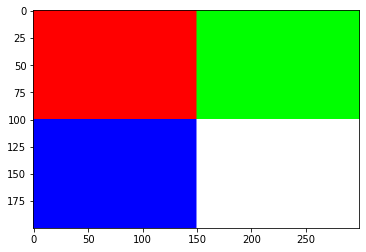

In [1]:
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((200, 300, 3), dtype=np.uint8)

image[:100, :150] = [255, 0, 0]       
image[:100, 150:] = [0, 255, 0]       
image[100:, :150] = [0, 0, 255]       
image[100:, 150:] = [255, 255, 255]   

plt.imshow(image) 
plt.show()

### 2. Recover the number 7 from the image `seven.png`: $[10 pts]$  
<img src = "seven.png">

- You can use any method and any module!

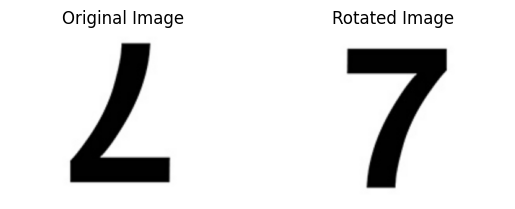

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = 'seven.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

rotated_image = cv2.rotate(image, cv2.ROTATE_180)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.show()


### 3. For the red rectangle image, `src`, obtained by the following code,
 - Perform `Perspective transform` to create a square (정사각형) with a side length of 300 $[20pts]$

In [17]:
import cv2
import numpy as np
height = 500
width = 300
red = (0, 0, 255)
src = np.zeros((height, width, 3), dtype=np.uint8)
src[:,:] = red
cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

Solution)

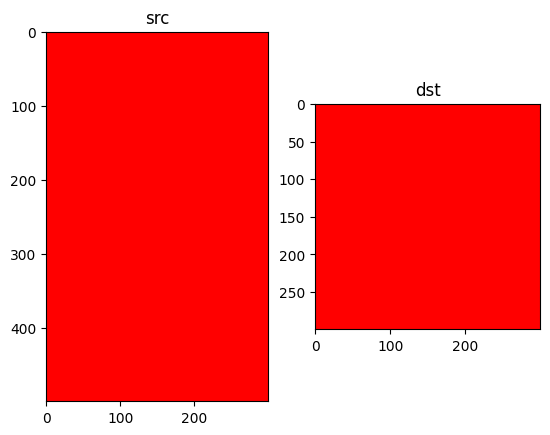

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

height = 500
width = 300
red = (0, 0, 255)
src = np.zeros((height, width, 3), dtype=np.uint8)
src[:,:] = red
src_pts = np.float32([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]])

dst_size = 300
dst_pts = np.float32([[0, 0], [dst_size-1, 0], [dst_size-1, dst_size-1], [0, dst_size-1]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (dst_size, dst_size))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

### 4. For the image array, `src`, obtained by the following code,

- Pperform `Affine transform` to create an equilateral triangle (정삼각형) with a side length of 300, and show the result. $[20pts]$

In [26]:
import cv2
import numpy as np
height = 500
width = 300
red = (0, 0, 255)
src = np.zeros((height, width, 3), dtype=np.uint8)
pts_tri = [[0, height-1], [int(width/2), 0], [width-1, height-1]]
cv2.fillConvexPoly(src, np.array(pts_tri), red)
cv2.imshow('tri', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Solution)

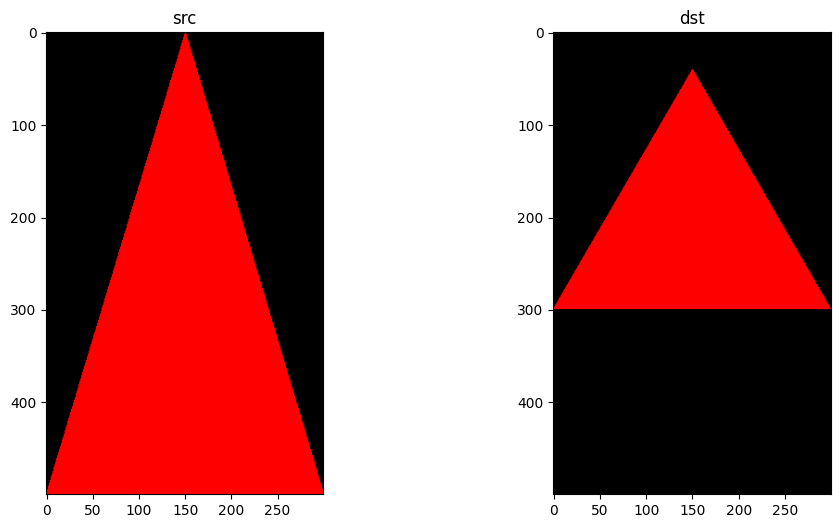

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

height = 500
width = 300
red = (0, 0, 255)

src = np.zeros((height, width, 3), dtype=np.uint8)

pts_tri = [[0, height-1], [int(width/2), 0], [width-1, height-1]]
cv2.fillConvexPoly(src, np.array(pts_tri), red)

side_length = 300

pts_src = np.float32([[0, height-1], [int(width/2), 0], [width-1, height-1]])

height_equilateral = int(np.sqrt(side_length**2 - (side_length/2)**2))

pts_dst = np.float32([[0, side_length-1], [side_length/2, side_length-1-height_equilateral], [side_length-1, side_length-1]])

M_cv2 = cv2.getAffineTransform(pts_src, pts_dst)

dst = cv2.warpAffine(src, M_cv2, (src.shape[1], src.shape[0]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()


### 5. For given points of source and destination,$[20 pts]$  

- A. Calculate affine transform matrix `without using cv2 module`. $[10 pts]$  
- B. Show that the obtained transform matrix is exactly the same as that obtained by using cv2 moduel. $[10 pts]$  

In [10]:
# A
import numpy as np

pts_src = [[200,100],[400,100],[200,200]]
pts_dst = [[200,300],[400,200],[200,400]]

matrix_src = np.array([[pts_src[0][0],pts_src[1][0],pts_src[2][0]],[pts_src[0][1],pts_src[1][1],pts_src[2][1]],[1,1,1]])
matrix_dst = np.array([[pts_dst[0][0],pts_dst[1][0],pts_dst[2][0]],[pts_dst[0][1],pts_dst[1][1],pts_dst[2][1]],[1,1,1]])

inv_matrix_src= np.linalg.inv(matrix_src)

A = np.matmul(matrix_dst,inv_matrix_src)
affine_matrix = A[:2,:]
np.set_printoptions(precision=3, suppress=True)
print(affine_matrix)

[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]


In [11]:
# B
import cv2
pts_src = np.float32([[200,100],[400,100],[200,200]])
pts_dst = np.float32([[200,300],[400,200],[200,400]])

M_cv2 =cv2.getAffineTransform(pts_src,pts_dst) # float 32값이 어야 함
print(M_cv2)

[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]


### 6. Face Detection $[20 pts]$  

- A. Detect all faces from the given image, `bts.jpg`, draw boxes of the faces and show the result. $[10pts]$  
- B. Select the largest faces in terms of area, draw a green box of the face and show the result $[10pts]$

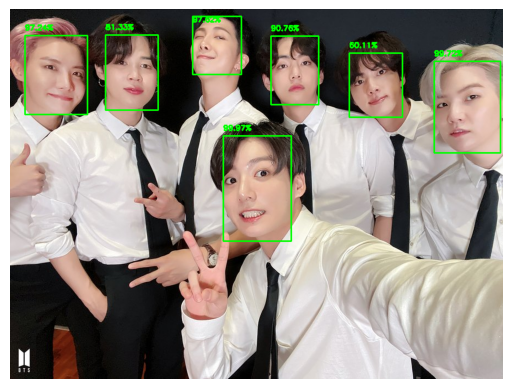

In [12]:
#A
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "../models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "../models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_face_dnn_cv(frame_bgr):
    (h, w) = frame_bgr.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame_bgr, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = f"{confidence * 100:.2f}%"

            # Draw the bounding box and label on the image
            cv2.rectangle(frame_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.putText(frame_bgr, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return frame_bgr

frame_bgr = cv2.imread(str("bts.jpg"))
frame_bgr = detect_face_dnn_cv(frame_bgr)

frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off') 
plt.show()

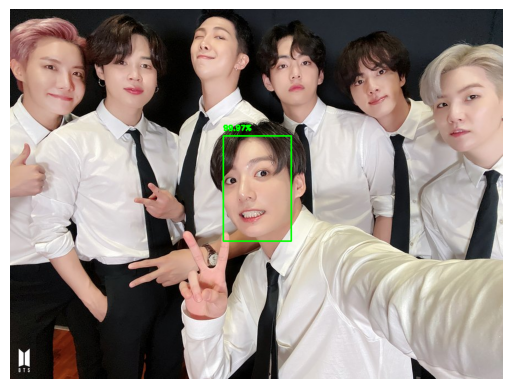

In [13]:
#B
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "../models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "../models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_largest_face_dnn_cv(frame_bgr):
    (h, w) = frame_bgr.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame_bgr, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    largest_face = None 
    largest_area = 0     

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            area = (endX - startX) * (endY - startY)  
            if area > largest_area:  
                largest_area = area
                largest_face = (startX, startY, endX, endY, confidence)

    if largest_face:  
        (startX, startY, endX, endY, confidence) = largest_face
        text = f"{confidence * 100:.2f}%"
        cv2.rectangle(frame_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(frame_bgr, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return frame_bgr

frame_bgr = cv2.imread("bts.jpg")
frame_bgr = detect_largest_face_dnn_cv(frame_bgr)

frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off') 
plt.show()


### 7. `Bonus Problem [40 pts]`

- Read `trapezoid.png`  
- Write code to find four vertices (꼭지점) of the read trapezoid (사다리꼴) and to perform `Perspective Transform` to warp the trapezoid to the sqaure (정사각형) with size length of 300.

<img src = "trapezoid.png">

- Solution)

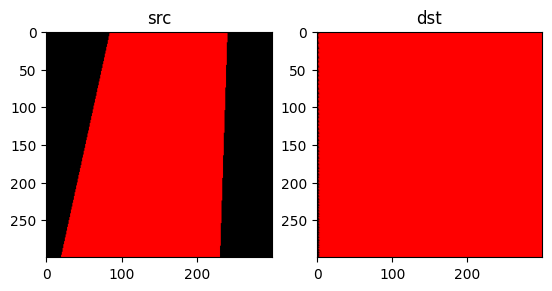

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("trapezoid.png")
src_pts= np.float32([[84,0],[225,0],[225, 300-1],[18,300-1]])

dst_size = 300
dst_pts = np.float32([[0, 0], [dst_size-1, 0], [dst_size-1, dst_size-1], [0, dst_size-1]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (dst_size, dst_size))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

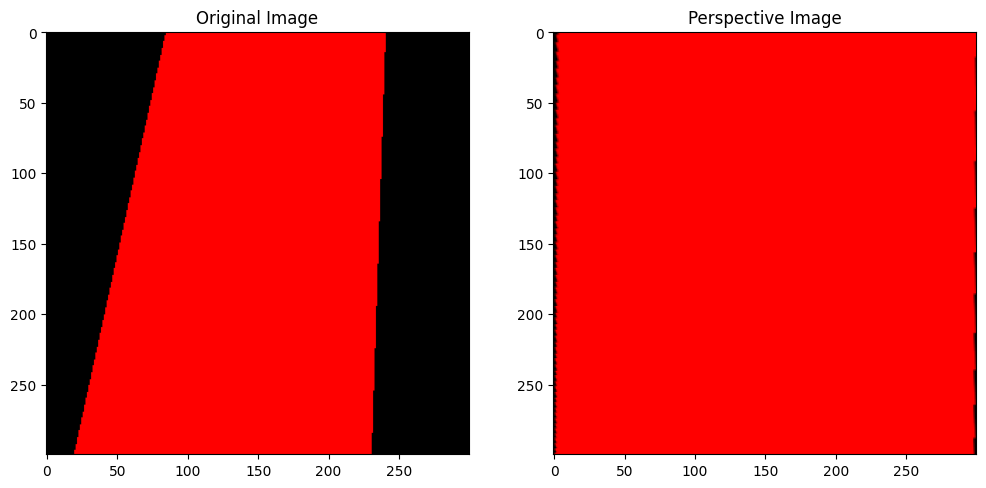

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 마우스 콜백 함수 정의
def get_points(event, x, y, flags, param):
    global pts_src, count, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 클릭 시
        pts_src.append([x, y])  # 클릭한 좌표를 리스트에 추가
        count += 1  # 클릭한 점의 개수 증가
        cv2.circle(img_copy, (x, y), 5, (0, 255, 0), -1)  # 초록색 점 그리기
        cv2.imshow('Select Points', img_copy)  # 이미지 업데이트하여 표시
        if count == 4:  # 4개의 점을 모두 선택했을 때
            cv2.destroyAllWindows()  # 윈도우 닫기

# 이미지 로드
src = cv2.imread("trapezoid.png")  # 이미지를 읽어옵니다
H, W = src.shape[:2]  # 이미지의 높이와 너비를 가져옵니다
img_copy = src.copy()  # 원본 이미지를 복사하여 사용합니다

# 원근 변환을 위한 점 설정을 위한 초기화
pts_src = []  # 클릭한 점들을 저장할 리스트
count = 0  # 클릭한 점의 개수를 세는 변수

# 마우스 콜백 설정
cv2.namedWindow('Select Points')  # 윈도우 생성
cv2.setMouseCallback('Select Points', get_points)  # 마우스 콜백 함수 설정

# 사용자가 4개의 점을 선택할 때까지 대기
cv2.imshow('Select Points', img_copy)  # 이미지를 윈도우에 표시
cv2.waitKey(0)  # 키 입력을 대기

# 변환할 대상 점 설정
pts_dst = np.float32([[0, 0], [0, H-1], [W-1, 0], [W-1, H-1]])  # 대상 점 좌표 설정

# 원근 변환 행렬 계산
if len(pts_src) == 4:  # 4개의 점을 모두 선택했을 때
    pts_src = np.float32(pts_src)  # 소스 점 좌표를 float32 형식으로 변환
    matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)  # 원근 변환 행렬 계산

    # 원근 변환 적용
    dst = cv2.warpPerspective(src, matrix, (W, H))  # 원근 변환을 적용하여 이미지 변환

    # 결과 이미지 표시
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    plt.subplot(121), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('Original Image')  # 원본 이미지 표시
    plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Perspective Image')  # 변환된 이미지 표시
    plt.show()  # 그래프 출력
else:
    print("4개의 점을 선택해야 합니다.") 